In [1]:
import os
from keras.layers import *
from matplotlib import pyplot as plt
from keras import backend as K
from keras import activations
from keras.models import Model,Sequential
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import save_img
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras import metrics
from pathlib import Path
import sklearn.metrics
import numpy as np
import pandas as pd
import cv2
from keras import backend as K
import seaborn as sns
# for keras
#from classification_models.keras import Classifiers

# for tensorflow.keras
# from classification_models.tfkeras import Classifiers

#ResNet18, preprocess_input = Classifiers.get('resnet18')

In [2]:
import PIL 
from shutil import copyfile

In [3]:
#for reproducible results
seed_value=42
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

In [4]:
lis=['train',"test","weights_resnet50"]
parent="./"
for i in range(3):
    path=os.path.join(parent,lis[i])
    os.mkdir(path)

In [5]:
train_data=[]
li=os.listdir('../input/x-ray-covid-final/X_Ray_covid_final/Covid')
for file in li:
 train_data.append(['{}/{}'.format('../input/x-ray-covid-final/X_Ray_covid_final/Covid', file), 1, 'Covid'])
        
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train.head()

,File,DiseaseID,Disease Type
0,../input/x-ray-covid-final/X_Ray_covid_final/C...,1,Covid
1,../input/x-ray-covid-final/X_Ray_covid_final/C...,1,Covid
2,../input/x-ray-covid-final/X_Ray_covid_final/C...,1,Covid
3,../input/x-ray-covid-final/X_Ray_covid_final/C...,1,Covid
4,../input/x-ray-covid-final/X_Ray_covid_final/C...,1,Covid


In [6]:
train_data = []
for defects_id, sp in enumerate(['Non-Covid']):
    li=os.listdir(os.path.join('../input/x-ray-covid-final/X_Ray_covid_final/', 'Normal'))
    
    for file in li:
        train_data.append(['{}/{}'.format('../input/x-ray-covid-final/X_Ray_covid_final/Normal', file), defects_id, 'Normal'])
        
train_c = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train_c.head()

,File,DiseaseID,Disease Type
0,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal
1,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal
2,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal
3,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal
4,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal


In [7]:
train_c.head()

,File,DiseaseID,Disease Type
0,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal
1,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal
2,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal
3,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal
4,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal


In [8]:

train_c.shape

(145, 3)

In [9]:
train_data = []
for defects_id, sp in enumerate(['Non-Covid']):
    li=os.listdir(os.path.join('../input/x-ray-covid-final/X_Ray_covid_final/', 'Viral Pneumonia'))
    
    for file in li:
        train_data.append(['{}/{}'.format('../input/x-ray-covid-final/X_Ray_covid_final/Viral Pneumonia', file), defects_id, 'Viral Pneumonia'])
        
train_d = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train_d.head()

,File,DiseaseID,Disease Type
0,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia
1,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia
2,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia
3,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia
4,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia


In [10]:

train_d.shape

(145, 3)

In [11]:
train_d.head()

,File,DiseaseID,Disease Type
0,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia
1,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia
2,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia
3,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia
4,../input/x-ray-covid-final/X_Ray_covid_final/V...,0,Viral Pneumonia


In [12]:


train=pd.concat([train,train_c,train_d],ignore_index=True)


In [13]:
train=train.sample(frac=1)
train=train.reset_index()
train=train.drop(columns=['index'],axis=0)
train.head()

,File,DiseaseID,Disease Type
0,../input/x-ray-covid-final/X_Ray_covid_final/C...,1,Covid
1,../input/x-ray-covid-final/X_Ray_covid_final/C...,1,Covid
2,../input/x-ray-covid-final/X_Ray_covid_final/C...,1,Covid
3,../input/x-ray-covid-final/X_Ray_covid_final/N...,0,Normal
4,../input/x-ray-covid-final/X_Ray_covid_final/C...,1,Covid


In [14]:
train.shape

(575, 3)

In [15]:
#defining function for resizing and loading images
IMAGE_SIZE = 224
def read_image(filepath):
    return cv2.imread(filepath,0) 
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

In [16]:
def to_rgb(img):
    
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

In [17]:
#storing images in array form and converting them 3 channel from 1 channel
X_train=np.zeros((train.shape[0],IMAGE_SIZE,IMAGE_SIZE))
rgb_list=[]
Y_train=[]

for i in range(train.shape[0]):
    file=train['File'][i]
    image=read_image(file)
    if image is not None:
        X_train[i]=resize_image(image,(IMAGE_SIZE,IMAGE_SIZE))
        
        
        rgb = to_rgb(X_train[i])
        rgb_list.append(rgb)
        Y_train.append(train['DiseaseID'][i])
        
rgb_arr = np.stack([rgb_list],axis=4)
rgb_arr_to_3d = np.squeeze(rgb_arr, axis=4)
X_train=rgb_arr_to_3d        


In [18]:
# storing output labels in tabular form
Y_train=np.array(Y_train)
print(Y_train.shape)
print(np.unique(Y_train, return_counts=True))
Y_train = to_categorical(Y_train, num_classes=2)

print(Y_train.shape)

(575,)
(array([0, 1]), array([290, 285]))
(575, 2)


In [19]:
Y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [20]:
X_train.shape

(575, 224, 224, 3)

In [21]:
X_train=preprocess_input(X_train)

In [22]:
#train test split of the data
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,stratify=Y_train, test_size=0.2)

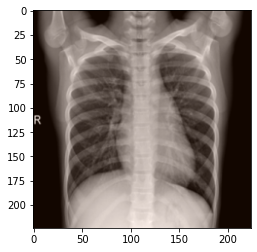

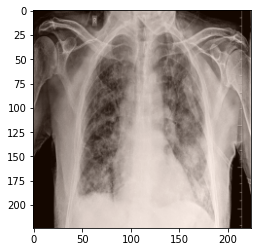

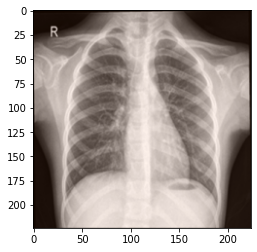

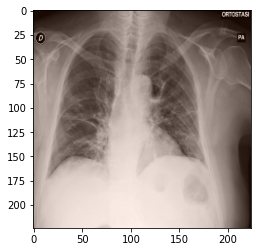

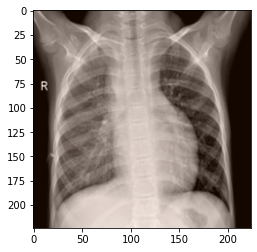

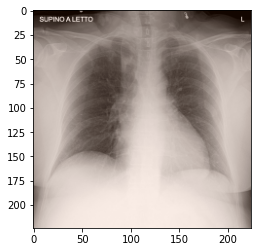

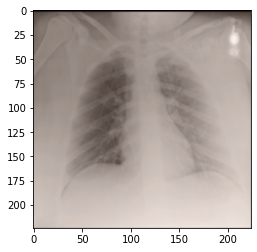

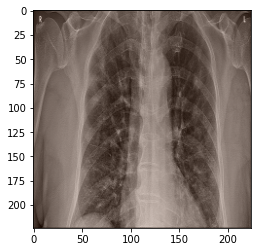

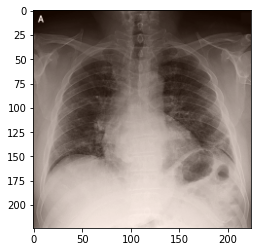

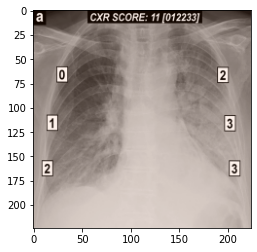

In [23]:
#Training data set examples
for i in range(10):
    plt.imshow(array_to_img(X_train[i]))
    #name="train_image"+str(i)+".png"
    #save_img("./train_resnet50/"+name,array_to_img(X_train[i]))
    plt.show()

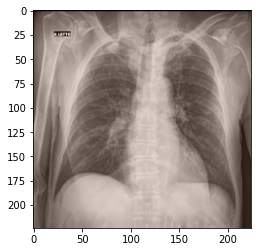

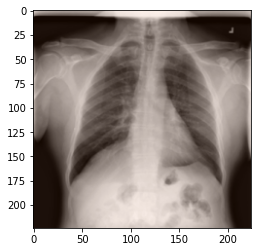

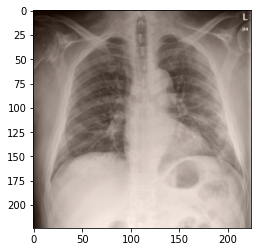

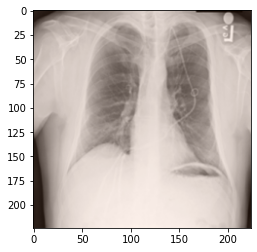

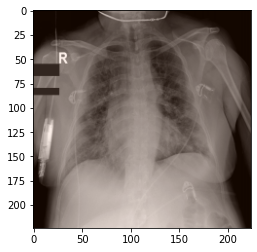

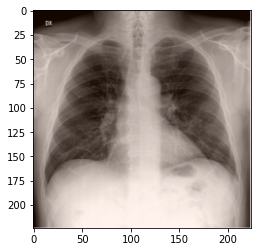

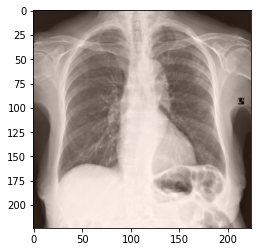

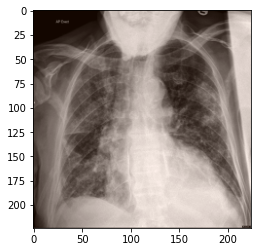

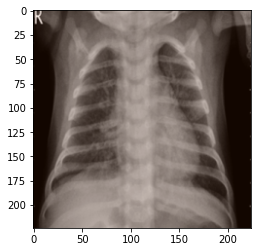

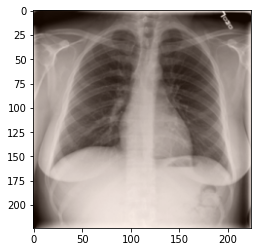

In [24]:
#Testing dataset examples
for i in range(10):
    plt.imshow(array_to_img(X_val[i]))
    #name="test_image"+str(i)+".png"
    #save_img("./test_resnet50/"+name,array_to_img(X_val[i]))
    plt.show()

In [25]:
#loading convolutional layer weights of resnet50 and setting layer.trainable=false
input_image = Input(shape=(224,224, 3))
base = ResNet50(weights = 'imagenet', include_top = False,input_tensor=input_image)

base.trainable = False


94773248/94765736 [==============================] - 3s 0us/step


In [26]:
base.output.shape

TensorShape([None, 7, 7, 2048])

In [27]:
base_output=base.predict(X_train)

In [28]:
X_val=base.predict(X_val)

In [29]:
###Capsule layer implementation#####3
# the squashing function.
"""
The non-linear activation used in Capsule. It drives the length of a large vector to near 1 and small vector to 0
:param vectors: some vectors to be squashed, N-dim tensor
:param axis: the axis to squash
:return: a Tensor with same shape as input vectors
"""
def squash(x, axis=-1):
    s_squared_norm = K.sum(K.square(x), axis, keepdims=True) + K.epsilon()
    scale = K.sqrt(s_squared_norm) / (0.5 + s_squared_norm)
    return scale * x

# define our own softmax function instead of K.softmax
# because K.softmax can not specify axis.
def softmax(x, axis=-1):
    ex = K.exp(x - K.max(x, axis=axis, keepdims=True))
    return ex / K.sum(ex, axis=axis, keepdims=True)
def margin_loss(y_true, y_pred):
    lamb, margin = 0.5, 0.1 #default lambda 0.5 - but test with lambda with 0.9 - 0.1
    y_pred=K.flatten(y_pred)
    y_true=K.flatten(y_true)
    return K.mean(y_true * K.square(K.relu(1 - margin - y_pred)) + lamb * (1 - y_true) * K.square(K.relu(y_pred - margin)), axis=-1)

def caps_batch_dot(x, y):
    x = K.expand_dims(x, 2)
    if K.int_shape(x)[3] is not None:
        y = K.permute_dimensions(y, (0, 1, 3, 2))
    o = tf.matmul(x, y)
    return K.squeeze(o, 2)

class Capsule(Layer):
    """
    The capsule layer. It is similar to Dense layer. Dense layer has `in_num` inputs, each is a scalar, the output of the 
    neuron from the former layer, and it has `out_num` output neurons. CapsuleLayer just expand the output of the neuron
    from scalar to vector. So its input shape = [None, input_num_capsule, input_dim_capsule] and output shape = \
    [None, num_capsule, dim_capsule]. For Dense Layer, input_dim_capsule = dim_capsule = 1.
    
    :param num_capsule: number of capsules in this layer
    :param dim_capsule: dimension of the output vectors of the capsules in this layer
    :param routings: number of iterations for the routing algorithm
    """
    def __init__(self,
                 num_capsule,
                 dim_capsule,
                 routings=3,
                 share_weights=True,
                 activation='squash',
                 **kwargs):
        super(Capsule, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings
        self.share_weights = share_weights
        if activation == 'squash':
            self.activation = squash
        else:
            self.activation = activations.get(activation)

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        if self.share_weights:
            self.kernel = self.add_weight(
                name='capsule_kernel',
                shape=(1, input_dim_capsule,
                       self.num_capsule * self.dim_capsule),
                initializer='glorot_uniform',
                trainable=True)
        else:
            if input_shape[-2] is None:
                raise ValueError("Input Shape must be defied if weights not shared.")
            input_num_capsule = input_shape[-2]
            self.kernel = self.add_weight(
                name='capsule_kernel',
                shape=(input_num_capsule, input_dim_capsule,
                       self.num_capsule * self.dim_capsule),
                initializer='glorot_uniform',
                trainable=True)

    def call(self, inputs):
        """Following the routing algorithm from Hinton's paper,
        but replace b = b + <u,v> with b = <u,v>.
        This change can improve the feature representation of Capsule.
        However, you can replace
            b = K.batch_dot(outputs, hat_inputs, [2, 3])
        with
            b += K.batch_dot(outputs, hat_inputs, [2, 3])
        to realize a standard routing.
        """

        if self.share_weights:
            hat_inputs = K.conv1d(inputs, self.kernel)
        else:
            hat_inputs = K.local_conv1d(inputs, self.kernel, [1], [1])

        batch_size = K.shape(inputs)[0]
        input_num_capsule = K.shape(inputs)[1]
        hat_inputs = K.reshape(hat_inputs,
                               (batch_size, input_num_capsule,
                                self.num_capsule, self.dim_capsule))
        hat_inputs = K.permute_dimensions(hat_inputs, (0, 2, 1, 3))

        b = K.zeros_like(hat_inputs[:, :, :, 0])

        
        # Begin: Routing algorithm ---------------------------------------------------------------------#
        # The prior for coupling coefficient, initialized as zeros.
        # b.shape = [None, self.num_capsule, self.input_num_capsule].

        for i in range(self.routings):
            c = softmax(b, 1)
            o = self.activation(caps_batch_dot(c, hat_inputs))
            if i < self.routings - 1:
                b = caps_batch_dot(o, hat_inputs)
                if K.backend() == 'theano':
                    o = K.sum(o, axis=1)
        # End: Routing algorithm -----------------------------------------------------------------------#
        return o

    def compute_output_shape(self, input_shape):
        return (None, self.num_capsule, self.dim_capsule)
        
    def get_config(self):
        config = {
            'num_capsule': self.num_capsule,
            'dim_capsule': self.dim_capsule,
            'routings': self.routings
        }
        base_config = super(Capsule, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [30]:
base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [67]:
inputt=Input(shape=(base_output.shape[1],base_output.shape[2],base_output.shape[3]))
output = Conv2D(256,(5,5), activation='relu',padding='same')(inputt)

output = Conv2D(256,(3, 3), activation='relu',padding='same')(output)

output = Conv2D(256,(3, 3), activation='relu',padding='same')(output)



x = Reshape((-1,256))(output)
x = Capsule(4,16, 3, True)(x)  
x = Capsule(4, 16, 3, True)(x)
capsule=Capsule(2,16,3,True)(x)
#capsule=Capsule(2,16,3,True)(capsule)
outputt = Lambda(lambda z: K.sqrt(K.sum(K.square(z), 2)))(capsule)
model = Model(inputs=inputt, outputs=outputt)

ResCapsnet_Binarymodel = Model(inputt, outputs=outputt)
#ResCapsnet_Binarymodel.summary()

In [68]:
p=Y_train
p[np.where(p == 0)] = -1
opt= Adam()
ResCapsnet_Binarymodel.compile(
    optimizer=opt,
    loss=margin_loss,
    metrics=['accuracy'],
)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
ResCapsnet_Binarymodel.summary()


es =  ModelCheckpoint(monitor='val_accuracy', mode='max', filepath='./model.h5',save_weights_only=True,save_best_only=True  )
es1 =  ModelCheckpoint(monitor='val_loss', mod='min', filepath='./model_loss.h5',save_weights_only=True,save_best_only=True  )

history=ResCapsnet_Binarymodel.fit(base_output,Y_train ,epochs=300,validation_split=0.10, batch_size=32, callbacks=[es,es1])


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 7, 7, 2048)]      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         13107456  
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         590080    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 256)         590080    
_________________________________________________________________
reshape_1 (Reshape)          (None, 49, 256)           0         
_________________________________________________________________
capsule_3 (Capsule)          (None, 4, 16)             16384     
_________________________________________________________________
capsule_4 (Capsule)          (None, 4, 16)             1024

In [72]:
#tf.cast(X_val, tf.float32)
ResCapsnet_Binarymodel.load_weights('../input/model-loss/model_loss.h5')
pred = ResCapsnet_Binarymodel.predict(X_val)
ResCapsnet_Binarymodel.evaluate(X_val,Y_val)

4/4 [==============================] - 0s 14ms/step - loss: 0.0120 - accuracy: 0.9826


[0.012001927010715008, 0.9826086759567261]

In [ ]:
#ResCapsnet_Binarymodel.save_weights('densenet121_capsule_Covid19_margin_loss.h5')
#ResCapsnet_Binarymodel.save('densenet121_capsule_Covid19_X_ray_margin_loss.h5')

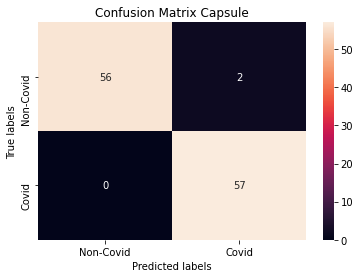

In [73]:
confusion_matrix=sklearn.metrics.confusion_matrix(Y_val.argmax(axis=1), ResCapsnet_Binarymodel.predict(X_val).argmax(axis=1))
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Capsule'); 
ax.xaxis.set_ticklabels(['Non-Covid', 'Covid']); ax.yaxis.set_ticklabels(['Non-Covid', 'Covid']);


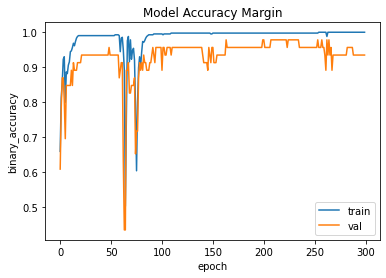

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Margin')
plt.ylabel('binary_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

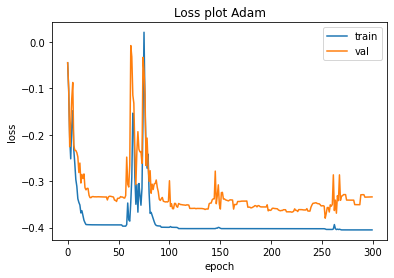

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss plot Adam')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [77]:
sklearn.metrics.accuracy_score(Y_val.argmax(axis=1),ResCapsnet_Binarymodel.predict(X_val).argmax(axis=1))

0.9826086956521739

In [78]:
from sklearn.metrics import classification_report
print(classification_report(Y_val.argmax(axis=1),ResCapsnet_Binarymodel.predict(X_val).argmax(axis=1),target_names=['Non-Covid','Covid']))

              precision    recall  f1-score   support

   Non-Covid       1.00      0.97      0.98        58
       Covid       0.97      1.00      0.98        57

    accuracy                           0.98       115
   macro avg       0.98      0.98      0.98       115
weighted avg       0.98      0.98      0.98       115



In [79]:
extracted_features_train=base_output
extracted_features_train=extracted_features_train.reshape(base_output.shape[0],-1)
extracted_features_train.shape

(460, 100352)

In [80]:
extracted_features_test=X_val
extracted_features_test=extracted_features_test.reshape(X_val.shape[0],-1)
extracted_features_test.shape

(115, 100352)

In [81]:
from sklearn.ensemble import RandomForestClassifier as RF
RF_model=RF(n_estimators=51,random_state=42)
RF_model.fit(extracted_features_train,Y_train.argmax(axis=1))[:1]
RF_predictions=RF_model.predict_proba(extracted_features_test)
print("Accuracy= ",sklearn.metrics.accuracy_score(Y_val.argmax(axis=1),RF_model.predict(extracted_features_test)))

Accuracy=  0.9217391304347826


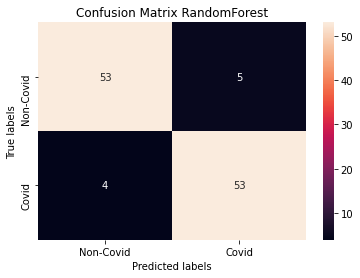

In [82]:
confusion_matrix=sklearn.metrics.confusion_matrix(Y_val.argmax(axis=1),RF_model.predict(extracted_features_test))
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix RandomForest'); 
ax.xaxis.set_ticklabels(['Non-Covid', 'Covid']); ax.yaxis.set_ticklabels(['Non-Covid', 'Covid']);

In [83]:
from sklearn.metrics import classification_report
print(classification_report(Y_val.argmax(axis=1), RF_model.predict(extracted_features_test), target_names=['Non-Covid','Covid']))

              precision    recall  f1-score   support

   Non-Covid       0.93      0.91      0.92        58
       Covid       0.91      0.93      0.92        57

    accuracy                           0.92       115
   macro avg       0.92      0.92      0.92       115
weighted avg       0.92      0.92      0.92       115



In [84]:
#we will now input the extracted features into Support Vector Machines 
from sklearn import svm
SVM_model=svm.SVC(kernel='linear')
SVM_model.fit(extracted_features_train,Y_train.argmax(axis=1))


SVC(kernel='linear')

In [85]:
SVM_predictions=SVM_model.decision_function(extracted_features_test)

In [86]:
print("Accuracy= ",sklearn.metrics.accuracy_score(Y_val.argmax(axis=1),SVM_model.predict(extracted_features_test)))

Accuracy=  0.9565217391304348


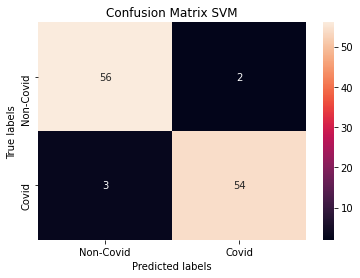

In [87]:
confusion_matrix=sklearn.metrics.confusion_matrix(Y_val.argmax(axis=1),SVM_model.predict(extracted_features_test))
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix SVM'); 
ax.xaxis.set_ticklabels(['Non-Covid', 'Covid']); ax.yaxis.set_ticklabels(['Non-Covid', 'Covid']);

In [88]:
from sklearn.metrics import classification_report
print(classification_report(Y_val.argmax(axis=1), SVM_model.predict(extracted_features_test), target_names=['Non-Covid','Covid']))

              precision    recall  f1-score   support

   Non-Covid       0.95      0.97      0.96        58
       Covid       0.96      0.95      0.96        57

    accuracy                           0.96       115
   macro avg       0.96      0.96      0.96       115
weighted avg       0.96      0.96      0.96       115



In [89]:
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(50,50,25), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(extracted_features_train,Y_train.argmax(axis=1))

MLPClassifier(hidden_layer_sizes=(50, 50, 25), max_iter=300, random_state=1)

In [90]:
pred_mlp = classifier.predict_proba(extracted_features_test)
print("Accuracy= ",sklearn.metrics.accuracy_score(Y_val.argmax(axis=1),classifier.predict(extracted_features_test)))

Accuracy=  0.9478260869565217


In [91]:
#MLP.save_weights('MLP.h5')
#MLP.save('MLP_model.h5')

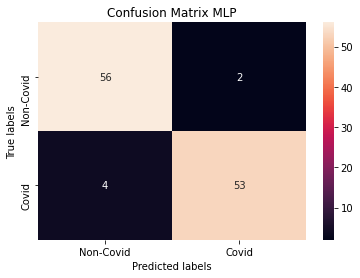

In [92]:
confusion_matrix=sklearn.metrics.confusion_matrix(Y_val.argmax(axis=1),classifier.predict(extracted_features_test))
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix MLP'); 
ax.xaxis.set_ticklabels(['Non-Covid', 'Covid']); ax.yaxis.set_ticklabels(['Non-Covid', 'Covid']);

In [93]:
from sklearn.metrics import classification_report
print(classification_report(Y_val.argmax(axis=1), classifier.predict(extracted_features_test), target_names=['Non-Covid','Covid']))

              precision    recall  f1-score   support

   Non-Covid       0.93      0.97      0.95        58
       Covid       0.96      0.93      0.95        57

    accuracy                           0.95       115
   macro avg       0.95      0.95      0.95       115
weighted avg       0.95      0.95      0.95       115



In [94]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(extracted_features_train,Y_train.argmax(axis=1))
pred_tree=clf.predict_proba(extracted_features_test)
print("Accuracy= ",sklearn.metrics.accuracy_score(Y_val.argmax(axis=1),clf.predict(extracted_features_test)))

Accuracy=  0.8260869565217391


In [95]:
from sklearn.metrics import classification_report
print(classification_report(Y_val.argmax(axis=1), clf.predict(extracted_features_test), target_names=['Non-Covid','Covid']))

              precision    recall  f1-score   support

   Non-Covid       0.81      0.86      0.83        58
       Covid       0.85      0.79      0.82        57

    accuracy                           0.83       115
   macro avg       0.83      0.83      0.83       115
weighted avg       0.83      0.83      0.83       115



In [96]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model = model.fit(extracted_features_train,Y_train.argmax(axis=1))
pred_knn=model.predict_proba(extracted_features_test)
print("Accuracy= ",sklearn.metrics.accuracy_score(Y_val.argmax(axis=1),model.predict(extracted_features_test)))

Accuracy=  0.9304347826086956


In [97]:
from sklearn.metrics import classification_report
print(classification_report(Y_val.argmax(axis=1), model.predict(extracted_features_test), target_names=['Non-Covid','Covid']))

              precision    recall  f1-score   support

   Non-Covid       0.93      0.93      0.93        58
       Covid       0.93      0.93      0.93        57

    accuracy                           0.93       115
   macro avg       0.93      0.93      0.93       115
weighted avg       0.93      0.93      0.93       115



In [98]:
from sklearn.metrics import roc_curve


fpr_rf, tpr_rf,thresholds_RF_model= roc_curve(Y_val.argmax(axis=1), RF_predictions[:,1:])
fpr_svm, tpr_svm,thresholds_SVM_model = roc_curve(Y_val.argmax(axis=1), SVM_predictions)
fpr_capsule,tpr_capsule,thresholds_keras=roc_curve(Y_val.argmax(axis=1),pred[:,1:])
fpr_mlp,tpr_mlp,thresholds_keras=roc_curve(Y_val.argmax(axis=1),pred_mlp[:,1:])
fpr_tree,tpr_tree,thresholds_clf=roc_curve(Y_val.argmax(axis=1),pred_tree[:,1:])
fpr_knn,tpr_knn,thresholds_knn=roc_curve(Y_val.argmax(axis=1),pred_knn[:,1:])

In [99]:
from sklearn.metrics import auc
auc_rf = auc(fpr_rf, tpr_rf)
auc_svm = auc(fpr_svm, tpr_svm)
auc_capsule=auc(fpr_capsule,tpr_capsule)
auc_mlp=auc(fpr_mlp,tpr_mlp)
auc_tree=auc(fpr_tree,tpr_tree)
auc_knn=auc(fpr_knn,tpr_knn)

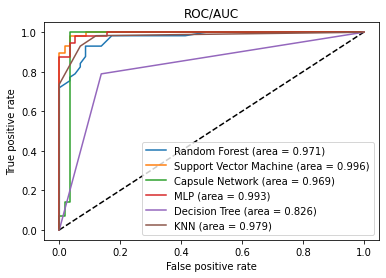

In [100]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = {:.3f})'.format(auc_rf))
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine (area = {:.3f})'.format(auc_svm))
plt.plot(fpr_capsule, tpr_capsule, label='Capsule Network (area = {:.3f})'.format(auc_capsule))
plt.plot(fpr_mlp, tpr_mlp, label='MLP (area = {:.3f})'.format(auc_mlp))
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (area = {:.3f})'.format(auc_tree))
plt.plot(fpr_knn, tpr_knn, label='KNN (area = {:.3f})'.format(auc_knn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC/AUC')
plt.legend(loc='best')
plt.show()

In [101]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc


fpr_rf, tpr_rf,_= precision_recall_curve(Y_val.argmax(axis=1), RF_predictions[:,1:])
fpr_svm, tpr_svm,_ = precision_recall_curve(Y_val.argmax(axis=1), SVM_predictions)
fpr_capsule,tpr_capsule,_=precision_recall_curve(Y_val.argmax(axis=1),pred[:,1:])
fpr_mlp,tpr_mlp,_=precision_recall_curve(Y_val.argmax(axis=1),pred_mlp[:,1:])
fpr_tree,tpr_tree,_=precision_recall_curve(Y_val.argmax(axis=1),pred_tree[:,1:])
fpr_knn,tpr_knn,_=precision_recall_curve(Y_val.argmax(axis=1),pred_knn[:,1:])

In [102]:
from sklearn.metrics import auc
auc_rf = auc(tpr_rf,fpr_rf)
auc_svm = auc(tpr_svm,fpr_svm )
auc_capsule=auc(tpr_capsule,fpr_capsule)
auc_mlp=auc(tpr_mlp,fpr_mlp)
auc_tree=auc(tpr_tree,fpr_tree)
auc_knn=auc(tpr_knn,fpr_knn)


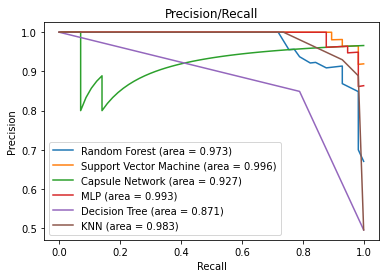

In [103]:
plt.figure(1)

plt.plot(tpr_rf,fpr_rf, label='Random Forest (area = {:.3f})'.format(auc_rf))
plt.plot(tpr_svm,fpr_svm,  label='Support Vector Machine (area = {:.3f})'.format(auc_svm))
plt.plot(tpr_capsule,fpr_capsule, label='Capsule Network (area = {:.3f})'.format(auc_capsule))
plt.plot( tpr_mlp,fpr_mlp, label='MLP (area = {:.3f})'.format(auc_mlp))
plt.plot( tpr_tree,fpr_tree, label='Decision Tree (area = {:.3f})'.format(auc_tree))
plt.plot(tpr_knn,fpr_knn,  label='KNN (area = {:.3f})'.format(auc_knn))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision/Recall')
plt.legend(loc='best')
plt.show()

In [104]:
!zip -r file.zip ./train

updating: train/ (stored 0%)
